In [1]:
#参考资料：https://blog.csdn.net/weixin_46382984/article/details/107727958
#导入库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

见PPT49页
<img src="./data.png">

In [2]:
data = np.array([71.1,72.4,72.4,72.1,71.4,72.0,71.6])

公式
<img src="./gs1.png">

In [3]:
# 求级比
rankData  =  np.array([ data[i]/data[i+1] for i in range(len(data)-1)])
rankData

array([0.9820442 , 1.        , 1.00416089, 1.00980392, 0.99166667,
       1.00558659])

In [4]:
print(f"级比为范围为 {rankData.min()}~{rankData.max()}")

级比为范围为 0.9820441988950275~1.0098039215686272


In [5]:
#对数据进行一次求和
sumData = data.cumsum()
sumData

array([ 71.1, 143.5, 215.9, 288. , 359.4, 431.4, 503. ])

公式
<img src="./gs2.png">

In [6]:
#构建矩阵B
BFRAME = np.array([[(-1/2)*(sumData[i]+sumData[i+1]),1] for i in range(len(sumData)-1)])
BFRAME

array([[-107.3 ,    1.  ],
       [-179.7 ,    1.  ],
       [-251.95,    1.  ],
       [-323.7 ,    1.  ],
       [-395.4 ,    1.  ],
       [-467.2 ,    1.  ]])

In [7]:
#构建矩阵Y
YFRAME = data[1:].T
YFRAME

array([72.4, 72.4, 72.1, 71.4, 72. , 71.6])

公式3
<img src="./gs3.png">

In [8]:
#按最小二乘法求出系数 a  b
a,b = np.linalg.inv(BFRAME.T.dot(BFRAME)).dot(BFRAME.T).dot(YFRAME)
a,b

(0.0023437864785236517, 72.65726960367881)

公式
<img src="./gs4.png">

In [9]:
#求出预测值
def SloveY(k):
    return (data[0] - (b/a))*np.exp(-a*k) + b/a
PredictData = [SloveY(i) for i in range(len(data))]
PredictData

[71.09999999999854,
 143.50574144042912,
 215.74197800232287,
 287.8091065037079,
 359.70752283365437,
 431.4376219544247,
 502.999797903678]

In [10]:
PredictBuild = np.zeros(len(PredictData))
PredictBuild[0] = PredictData[0]

for i in range(1, len(PredictBuild)):
    PredictBuild[i] = PredictData[i] - PredictData[i-1]
PredictBuild

array([71.1       , 72.40574144, 72.23623656, 72.0671285 , 71.89841633,
       71.73009912, 71.56217595])

残差公式
<img src="./gs5.png">

In [11]:
#原数据 data 与 预测数据 PredictBuild 的残差
#将PredictBuild进行一次累减
# CanChaData0 = np.diff(PredictBuild)
# canres = data - CanChaData0
residuals = (data - PredictBuild)
residuals

array([ 1.44950718e-12, -5.74144043e-03,  1.63763438e-01,  3.28714986e-02,
       -4.98416330e-01,  2.69900879e-01,  3.78240507e-02])

相对误差公式
<img src="./gs6.png">

In [12]:
#相对误差
relativeError = residuals/data
relativeError

array([ 2.03868802e-14, -7.93016634e-05,  2.26192594e-03,  4.55915376e-04,
       -6.98062087e-03,  3.74862332e-03,  5.28268865e-04])

级比偏差公式
<img src="./gs7.png">

In [13]:
#级比偏差
rankError = np.array([ 1-((1-0.5*a)/(1+0.5*a))*(1/rankData[i]) for i in range(len(rankData))])
rankError

array([-0.01590026,  0.00234104,  0.00647499,  0.01202705, -0.00604265,
        0.00788359])

In [14]:
#平均级比偏差
rankError.mean() #我们在之前的RankData中已经往前进行移动故不需要再从k=2进行处理（k=2仅数学表达上，非代码）

0.0011306285729361838

In [15]:
#最终统计表
yearData = [ i for i in range(1986,1993)]
newRankError  = np.insert(rankError, 0, 0)
AllIn = np.array([yearData,data, PredictBuild, residuals, relativeError,newRankError]).T
AllIn

array([[ 1.98600000e+03,  7.11000000e+01,  7.11000000e+01,
         1.44950718e-12,  2.03868802e-14,  0.00000000e+00],
       [ 1.98700000e+03,  7.24000000e+01,  7.24057414e+01,
        -5.74144043e-03, -7.93016634e-05, -1.59002600e-02],
       [ 1.98800000e+03,  7.24000000e+01,  7.22362366e+01,
         1.63763438e-01,  2.26192594e-03,  2.34104303e-03],
       [ 1.98900000e+03,  7.21000000e+01,  7.20671285e+01,
         3.28714986e-02,  4.55915376e-04,  6.47498898e-03],
       [ 1.99000000e+03,  7.14000000e+01,  7.18984163e+01,
        -4.98416330e-01, -6.98062087e-03,  1.20270523e-02],
       [ 1.99100000e+03,  7.20000000e+01,  7.17300991e+01,
         2.69900879e-01,  3.74862332e-03, -6.04264569e-03],
       [ 1.99200000e+03,  7.16000000e+01,  7.15621759e+01,
         3.78240507e-02,  5.28268865e-04,  7.88359279e-03]])

In [16]:
#转换为Pandas
yearData  = []
df = pd.DataFrame(AllIn, columns=["年份","原数据", "预测数据", "残差", "相对误差", "级比偏差"])
df

年份   原数据       预测数据            残差          相对误差      级比偏差
0  1986.0  71.1  71.100000  1.449507e-12  2.038688e-14  0.000000
1  1987.0  72.4  72.405741 -5.741440e-03 -7.930166e-05 -0.015900
2  1988.0  72.4  72.236237  1.637634e-01  2.261926e-03  0.002341
3  1989.0  72.1  72.067129  3.287150e-02  4.559154e-04  0.006475
4  1990.0  71.4  71.898416 -4.984163e-01 -6.980621e-03  0.012027
5  1991.0  72.0  71.730099  2.699009e-01  3.748623e-03 -0.006043
6  1992.0  71.6  71.562176  3.782405e-02  5.282689e-04  0.007884

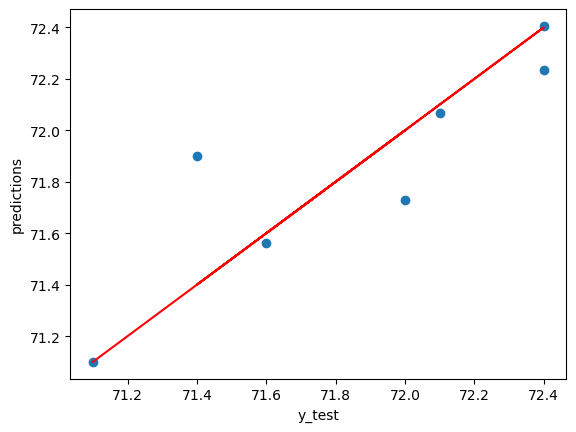

In [17]:
plt.scatter(data,PredictBuild)  #如果在 x-y = 0  (x=y)直线上，说明预测值与真实值误差很小
#绘制出散点的拟合曲线
plt.plot(data,data,'r')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()